# 7.01 Lesson 1 key concepts
## Reading the data

In [1093]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1094]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sys
import missingno
import warnings
warnings.filterwarnings('ignore')

In [1095]:
data = pd.read_csv('learningSet.csv')
print(data.shape)
#data.head()

(95412, 481)


In [1096]:
import bz2
import pickle
import _pickle as cPickle

In [1097]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [1098]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [1099]:
data['TARGET_D'].describe()

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

To solve this problem we will first build a classification model to predict who will more likely respond and then for those respondents, we will build a regression model to predict the donation amount.

Then we can use the cost matrix to calculate the total benefit from the donations

Some of the challenges with the dataset are as follows:

Large number of features: The data set has over 450 features. Hence selecting the right features for the model is very critical and at the same time it is not easy as the same traditional ways of removing features is not effective given the large number of features. Apart from feature selection, feature extraction (creating your own features using the existing features) is also not easy in this case.
Sparsity of the dataset: There are a lot of features with a large number of null values.
Data imbalance: For developing a classification, there is a huge imbalance in the training dataset with only approximately 5000 values for one category as compared to cover 95,000 instances for the other category.

# 7.01 Lesson 2 key concepts
## Review data cleaning process

There are a lot of columns that have a very high percentage of null values. It is a highly sparse dataset. 
We can decide on a threshold and then remove those variables. There is no rule of thumb to decide on this threshold value. 
Sometimes it can as low as 25%-30%. And sometimes in some data sets you might find that even though there are more than 50% missing values in a column, you might have to include that variable in your analysis. 
A lot of it depends on the business context as well. In this case we will take this threshold to be 25% and then check the definitions of the columns filtered, to see if there is any column that we might want to keep.

In [1100]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [1101]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [1102]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [1103]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


From the list above that includes the columns that have over 25% null values, you discussed with your manager you were told that the following columns are important -> wealth1, wealth2
We will remove these variables from the above list 
RDATE3, RAMNT_3 are important but they have too many null values 

# Activity
## Remove columns with null values already passed in the list

In [1104]:
cols = ['WEALTH1', 'WEALTH2']
for item in cols:
    drop_columns_list.remove(item)  
print(drop_columns_list)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [1105]:
data = data.drop(columns=drop_columns_list)
data.shape

(95412, 411)

## More data cleaning

In [1106]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


We can see that there are a lot of columns that have blank spaces which represent no value in this case. 
They were not identified as null values by python as they are empty spaces that are read as character values by 
python. We will replace those values by NaNs and repeat the analysis 

Before we do that we will replace the blank values from the column "MAILCODE" by "A" which would mean the address is okay (pl check the definition of the variable in the description)

In [1107]:
data['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [1108]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [1109]:
# Now we can replace the rest space characters with np.NaN

In [1110]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [1111]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,A,NaN,0,0,NaN,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,A,NaN,2801,0,NaN,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,A,NaN,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


# 7.01 Activity 3
## Remove columns with null values greater than a specified threshold

In [1112]:
nulls_percent_df_2 = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df_2.columns = ['column_name', 'nulls_percentage']
nulls_percent_df_2.head()

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.009726
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000


In [1113]:
columns_above_threshold_2 = nulls_percent_df_2[nulls_percent_df_2['nulls_percentage']>0.25]
print(len(columns_above_threshold_2['column_name']))

47


In [1114]:
drop_columns_list_2 = list(columns_above_threshold_2['column_name'])
print(drop_columns_list_2)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


We would again repeat the same exercise as the last time. We will discuss it with the team, manager, and/or other stakeholders to see which columns we need to retain here. 

Like last time we will keep the following -> wealth1, wealth2 along with these VETERANS, SOLIH

In [1115]:
#cols_2 = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']
for item in cols_2:
    drop_columns_list_2.remove(item) 

In [1116]:
data = data.drop(columns=drop_columns_list_2)
data.shape

(95412, 368)

In [1117]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,DOB,NOEXCH,MDMAUD,DOMAIN,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,3712,0,XXXX,T2,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,5202,0,XXXX,S1,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,A,0,0,XXXX,R2,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,A,2801,0,XXXX,R2,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,A,2001,0,XXXX,S2,...,0.0,1,L,2,F,X,X,X,26.0,A


# 7.01 Lesson 4 key concepts
## Separating Target, Numerical Features, and Categorical Features

Since we have a huge number of features, it would be easier to work independently on numerical features and categorical features.

For the target variables, for now we will retain them both together. But later, we will build a classification model first where we would need the column TARGET_B only.

In [1118]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [1119]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


In [1120]:
numerical.nunique()

ODATEDW        54
TCODE          55
DOB           947
AGE            96
INCOME          7
            ...  
AVGGIFT      7713
CONTROLN    95412
HPHONE_D        2
RFA_2F          4
CLUSTER2       62
Length: 335, dtype: int64

In [1121]:
categorical = data.select_dtypes(np.object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,...,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,...,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,...,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,...,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,...,A1E,L3D,L3D,A2D,L,F,X,X,X,A


## Working with categorical columns

We will work with the categorical features first. Look at the columns one by one. Some of the operations which we will perform are:

- Replace null values with the most occurring categories
- Reduce the number of categories in a column by grouping

It is important to note that some columns are defined by python as categorical/object types. There might be other columns defined as numerical that we want as categorical. We will look them later when we were working on numerical types.

In [1122]:
categorical.isna().sum()

OSOURCE       928
STATE           0
ZIP             0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
HOMEOWNR    22228
GENDER       2957
DATASRCE    21280
SOLIH       89212
VETERANS    84986
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_14      18867
RFA_16      20417
RFA_18      21263
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

## Categorical Variables

Here we will try to reduce the number of categories. An ideal way would have been to group the states into 
regions. But in this case we will group all the states with counts less than 2500 into one category "other"

In [1123]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()
df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [1124]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

# 7.01 Lab

In [1125]:
categorical.shape

(95412, 31)

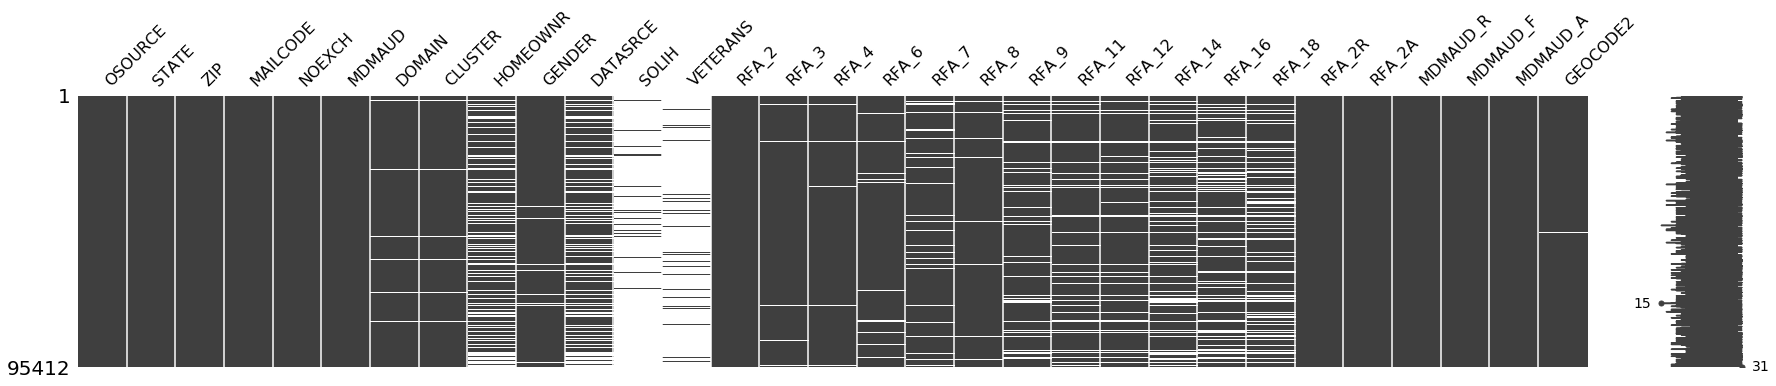

In [1126]:
# visualazing null values
missingno.matrix(categorical, figsize = (30,5))

In [1127]:
nulls_percent_cat = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_cat.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat.head()

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,NOEXCH,0.000073


In [1128]:
columns_above_threshold_2 = nulls_percent_cat[nulls_percent_cat['nulls_percentage']>0.15]
print(len(columns_above_threshold_2['column_name']))
columns_above_threshold_2

7


,column_name,nulls_percentage
8,HOMEOWNR,0.232969
10,DATASRCE,0.223033
11,SOLIH,0.935019
12,VETERANS,0.890727
22,RFA_14,0.197742
23,RFA_16,0.213988
24,RFA_18,0.222855


In [1129]:
drop_cats= list(columns_above_threshold_2['column_name'])

In [1130]:
drop_cats
len(drop_cats)

['HOMEOWNR', 'DATASRCE', 'SOLIH', 'VETERANS', 'RFA_14', 'RFA_16', 'RFA_18']

7

In [1131]:
cat_var_keep = ['SOLIH', 'VETERANS']
for item in cat_var_keep:
    drop_cats.remove(item) 

In [1132]:
categorical.drop(columns= drop_cats, inplace= True)

In [1133]:
categorical.shape

(95412, 26)

In [1134]:
categorical.columns

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'NOEXCH', 'MDMAUD', 'DOMAIN',
       'CLUSTER', 'GENDER', 'SOLIH', 'VETERANS', 'RFA_2', 'RFA_3', 'RFA_4',
       'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11', 'RFA_12', 'RFA_2R',
       'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

In [1135]:
categorical.drop(columns= ['OSOURCE', 'ZIP'], inplace= True)

In [1136]:
#Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest
categorical['GENDER'].value_counts(dropna= False)

F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: GENDER, dtype: int64

In [1137]:
categorical['GENDER'].dtype

dtype('O')

In [1138]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [1139]:
categorical['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [1140]:
def gender_type(x):
    if (str(x) == 'F') | (str(x) == 'M'):
        return x
    else:
        return 'O'

In [1141]:
categorical['GENDER']= categorical['GENDER'].apply(gender_type)

In [1142]:
categorical['GENDER'].value_counts()

F    54234
M    39094
O     2084
Name: GENDER, dtype: int64

# 7.02

We will work on the column DOMAIN. Let's replace the null values with the category that is represented the most and then we will split the data into two columns DOMAIN_A and DOMAIN_B.

- DOMAIN_A will consist of the first character from the DOMAIN
- DOMAIN_B will consist of the second character from the DOMAIN

Then we will drop the original column DOMAIN

In [1143]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, dtype: int64

In [1144]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [1145]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [1146]:
categorical = categorical.drop(columns=['DOMAIN'])

In [1147]:
categorical.head()

,STATE,MAILCODE,NOEXCH,MDMAUD,CLUSTER,GENDER,SOLIH,VETERANS,RFA_2,RFA_3,...,RFA_11,RFA_12,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,0,XXXX,36,F,NaN,NaN,L4E,S4E,...,S4E,S4E,L,E,X,X,X,C,T,2
1,CA,A,0,XXXX,14,M,NaN,NaN,L2G,A2G,...,A1E,A1E,L,G,X,X,X,A,S,1
2,NC,A,0,XXXX,43,M,NaN,NaN,L4E,S4E,...,S4F,S4F,L,E,X,X,X,C,R,2
3,CA,A,0,XXXX,44,F,NaN,NaN,L4E,S4E,...,S4E,S4E,L,E,X,X,X,C,R,2
4,FL,A,0,XXXX,16,F,12,NaN,L2F,A2F,...,A1E,A1E,L,F,X,X,X,A,S,2


### Activity 2.1

In [1148]:
red_cat= categorical[['MAILCODE', 'NOEXCH', 'MDMAUD']]

In [1149]:
red_cad_list= red_cat.columns

AxesSubplot(0.125,0.125;0.775x0.755)


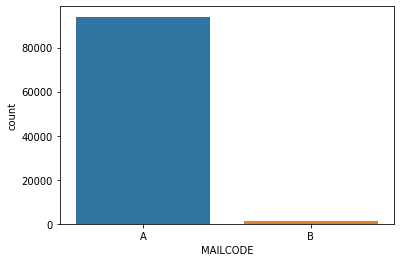

AxesSubplot(0.125,0.125;0.775x0.755)


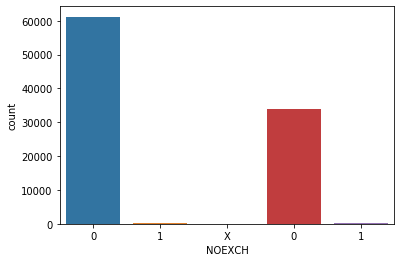

AxesSubplot(0.125,0.125;0.775x0.755)


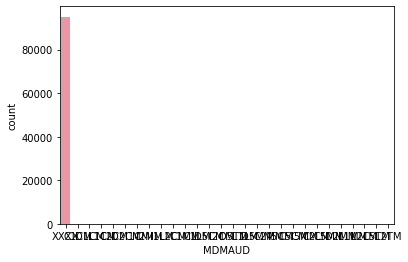

In [1150]:
red_cat= categorical[['MAILCODE', 'NOEXCH', 'MDMAUD']]
for x in red_cat.columns:
    if red_cat[x].dtype == 'object':
        plt.show()
        print(sns.countplot(x= x, data= red_cat))

In [1151]:
categorical.drop(columns= red_cad_list, inplace= True)

Replacing NULL values

In [1152]:
categorical['CLUSTER'].value_counts(dropna=False)

40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: CLUSTER, dtype: int64

In [1153]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [1154]:
categorical.columns

Index(['STATE', 'CLUSTER', 'GENDER', 'SOLIH', 'VETERANS', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11', 'RFA_12',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2',
       'DOMAIN_A', 'DOMAIN_B'],
      dtype='object')

In [1155]:
categorical['GENDER'].value_counts(dropna=False)

F    54234
M    39094
O     2084
Name: GENDER, dtype: int64

In [1156]:
#discuss why this makes more sense than the alternatives
categorical['GENDER'] = categorical['GENDER'].fillna('F')

### Activity 2.2.1

In [1157]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [1158]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [1159]:
categorical.head()
categorical.shape

,STATE,CLUSTER,GENDER,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,...,RFA_11,RFA_12,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,F,NaN,NaN,L4E,S4E,S4E,S4E,S4E,...,S4E,S4E,L,E,X,X,X,C,T,2
1,CA,14,M,NaN,NaN,L2G,A2G,A2G,A2G,A1E,...,A1E,A1E,L,G,X,X,X,A,S,1
2,NC,43,M,NaN,NaN,L4E,S4E,S4E,S4E,S4F,...,S4F,S4F,L,E,X,X,X,C,R,2
3,CA,44,F,NaN,NaN,L4E,S4E,S4E,S4E,S4E,...,S4E,S4E,L,E,X,X,X,C,R,2
4,FL,16,F,12,NaN,L2F,A2F,A2F,A1D,I2D,...,A1E,A1E,L,F,X,X,X,A,S,2


(95412, 22)

Removing columns with similar information

In [1160]:
categorical['RFA_2'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

In [1161]:
# We will keep the column RFA_2X. We will delete rest of the columns 

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [1162]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18',
 'MAXADATE',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12']

In [ ]:
categorical.isna().sum()

In [ ]:
drop_list

In [1164]:
for x in drop_list:
    if x in categorical.columns:
        categorical= categorical.drop(columns= x)
    else: pass

In [1170]:
categorical= categorical[['STATE', 'CLUSTER', 'GENDER', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B']]

In [1171]:
categorical.head()

,STATE,CLUSTER,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,F,L,E,C,T,2
1,CA,14,M,L,G,A,S,1
2,NC,43,M,L,E,C,R,2
3,CA,44,F,L,E,C,R,2
4,FL,16,F,L,F,A,S,2


# Working with numerical columns 

In [1172]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


In [1173]:
numerical.shape

(95412, 335)

In [1174]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


### Activity 2.2.2

In [1175]:
drop_list = []
for col_name in numerical.columns:
    if "ADATE" in col_name:
        drop_list.append(col_name)   

In [1176]:
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18',
 'MAXADATE']

In [1177]:
numerical['ADATE_2'].value_counts()

# The values in the column are pretty much the same throughtout, hence we will drop this column as well

9706    95399
9704       13
Name: ADATE_2, dtype: int64

### Filling NULL values with plots

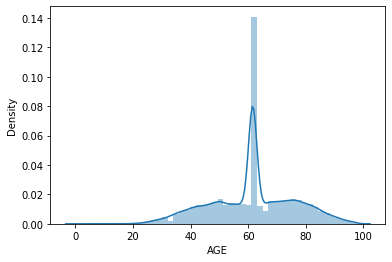

In [1178]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
sns.distplot(numerical['AGE'])
plt.show()
#probably would be a bit better to use a predictive method here but this works

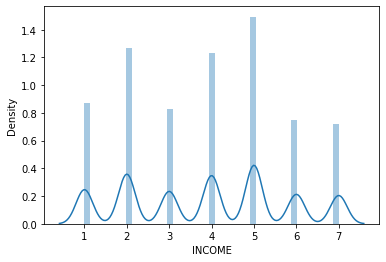

In [1179]:
#sns.distplot(numerical['INCOME'])  # this will not work as there are NaNs in the column
sns.distplot(numerical[numerical['INCOME'].isna()==False]['INCOME']) 
plt.show()

In [1180]:
# looks like the variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts())
numerical['INCOME'] = numerical['INCOME'].astype('object')

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [1181]:
numerical['INCOME'] = numerical['INCOME'].fillna('5.0') # Replacing the null values with the most represented categoty

In [1182]:
numerical['CLUSTER2'].value_counts()

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

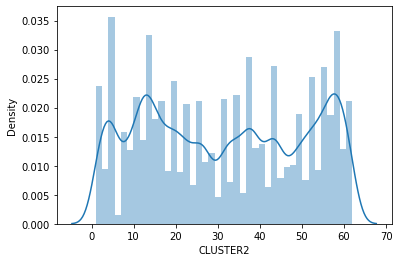

In [1183]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [1185]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(round(np.mean(numerical['CLUSTER2']), 0))

###Activity 2.3

In [ ]:
numerical

In [1186]:
columns_above_threshold_2 = nulls_percent_cat[nulls_percent_cat['nulls_percentage']>0.15]
print(len(columns_above_threshold_2['column_name']))
columns_above_threshold_2

7


,column_name,nulls_percentage
8,HOMEOWNR,0.232969
10,DATASRCE,0.223033
11,SOLIH,0.935019
12,VETERANS,0.890727
22,RFA_14,0.197742
23,RFA_16,0.213988
24,RFA_18,0.222855


In [1187]:
columns_above_threshold_2 = nulls_percent_cat[nulls_percent_cat['nulls_percentage']>0]
print(len(columns_above_threshold_2['column_name']))
columns_above_threshold_2

21


,column_name,nulls_percentage
0,OSOURCE,0.009726
4,NOEXCH,0.000073
6,DOMAIN,0.024274
7,CLUSTER,0.024274
8,HOMEOWNR,0.232969
9,GENDER,0.030992
10,DATASRCE,0.223033
11,SOLIH,0.935019
12,VETERANS,0.890727
14,RFA_3,0.020438


In [1188]:
numerical['WEALTH2'].value_counts(dropna= False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

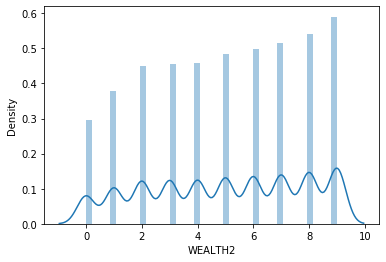

In [1189]:
sns.distplot(numerical[numerical['WEALTH2'].isna()==False]['WEALTH2']) 
plt.show()

In [1191]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('9.0')

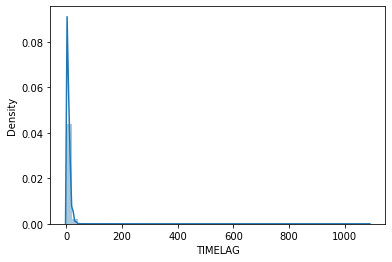

In [1192]:
sns.distplot(numerical[numerical['TIMELAG'].isna()==False]['TIMELAG']) 
plt.show()

In [1193]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna('1000')

In [1194]:
nulls_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
nulls_percent_num

,column_name,nulls_percentage
0,ODATEDW,0.0
1,TCODE,0.0
2,DOB,0.0
3,AGE,0.0
4,INCOME,0.0
...,...,...
330,AVGGIFT,0.0
331,CONTROLN,0.0
332,HPHONE_D,0.0
333,RFA_2F,0.0


In [1195]:
nulls_percent_num[nulls_percent_num['nulls_percentage']!=0]

,column_name,nulls_percentage
5,WEALTH1,0.468830
135,MSA,0.001383
136,ADI,0.001383
137,DMA,0.001383
302,ADATE_3,0.020438
303,ADATE_4,0.022964
304,ADATE_6,0.037280
305,ADATE_7,0.093007
306,ADATE_8,0.036798
307,ADATE_9,0.117857


In [1196]:
columns_above_threshold_num = nulls_percent_num[nulls_percent_num['nulls_percentage']>0.15]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [1197]:
numerical['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

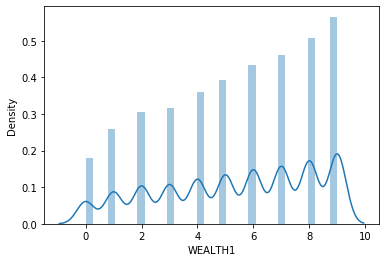

In [1198]:
sns.distplot(numerical[numerical['WEALTH1'].isna()==False]['WEALTH1']) 
plt.show()

In [1199]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')
numerical['WEALTH1'] = numerical['WEALTH1'].fillna('9.0')

In [1200]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')

In [1201]:
numerical['ADI'].isnull().sum()

132

In [1204]:
numerical['ADI'].value_counts(dropna= False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
103.0       1
651.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [ ]:
fillna(round(np.mean(numerical['CLUSTER2']), 0))

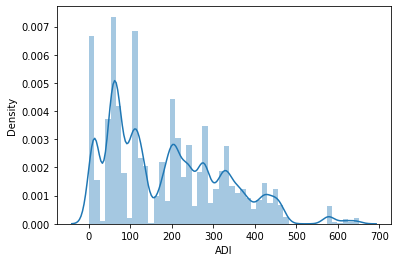

In [1208]:
numerical['ADI'] = numerical["ADI"].fillna(round(np.mean(numerical['ADI']),2))
sns.distplot(numerical['ADI'])

In [1209]:
numerical['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
552.0       1
584.0       1
516.0       1
554.0       1
Name: DMA, Length: 206, dtype: int64

In [1210]:
numerical['DMA'].isnull().sum()

132

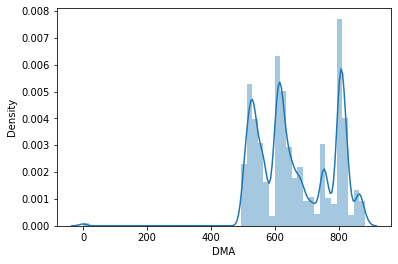

In [1211]:
numerical['DMA'] = numerical["DMA"].fillna(np.mean(numerical['DMA']))
sns.distplot(numerical['DMA'])

In [1212]:
numerical['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
3180.0        1
6323.0        1
9280.0        1
743.0         1
960.0         1
Name: MSA, Length: 298, dtype: int64

In [1213]:
numerical['MSA'].isnull().sum()

132

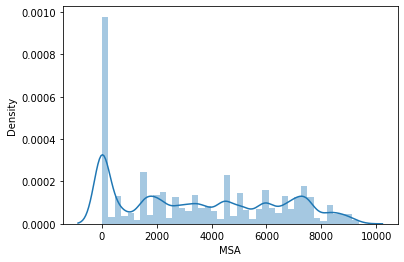

In [1214]:
numerical['MSA'] = numerical["MSA"].fillna(np.mean(numerical['MSA']))
sns.distplot(numerical['MSA'])

In [1215]:
numerical = numerical.drop(columns=drop_list)

In [1216]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,9.0,0,0,39,34,...,10.0,9512,8911,9003.0,4,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6,9,16,0,15,55,...,25.0,9512,9310,9504.0,18,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3,1,2,0,20,29,...,5.0,9512,9001,9101.0,12,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1,4,2,0,23,14,...,10.0,9512,8702,8711.0,9,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3,2,60,1,28,9,...,15.0,9601,7903,8005.0,14,6.864865,7112,1,2,26.0


In [1217]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
315,NEXTDATE,9973


In [1218]:
numerical.to_csv('numerical.csv')
categorical.to_csv('categorical.csv')

In [1219]:
Y.to_csv('target.csv')

In [1220]:
numerical.to_pickle('numerical.p')
categorical.to_pickle('categorical.p')
Y.to_pickle('target.p')